<a href="https://colab.research.google.com/github/rahul-727/DL-Lab-work/blob/main/2348544_Lab_4_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import f1_score

In [48]:
df = pd.read_csv('/content/telecom_customer_churn.csv')
df.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [49]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [50]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

# Handling missing values

In [51]:
numerical_features_with_nan = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']
for feature in numerical_features_with_nan:
    median_value = df[feature].median()
    df[feature].fillna(median_value, inplace=True)

categorical_features_with_nan = ['Multiple Lines', 'Internet Type', 'Online Security', 'Online Backup',
                                 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
                                 'Streaming Movies', 'Streaming Music', 'Unlimited Data']
for feature in categorical_features_with_nan:
    df[feature].fillna('Not Available', inplace=True)


# dropping unnecessary columns

In [52]:
df = df.drop(['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Total Charges', 'Total Revenue', 'Churn Reason'], axis=1)

Assigning target variable

In [53]:
y = df['Customer Status'].apply(lambda x: 1 if x == 'churned' else 0)
df.drop(['Customer Status', 'Churn Category'], axis=1, inplace=True)

# identifying categorical and numerical columns and processing them

In [54]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X = preprocessor.fit_transform(df)
y = y.to_numpy()

Spltting data

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline DNN Architecture
constructing a simple baseline DNN architecture without any dropout layers.

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def baseline_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

baseline_model = baseline_model()
baseline_history = baseline_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

baseline_model.evaluate(X_val, y_val)

baseline_predictions = baseline_model.predict(X_val)
baseline_pred_labels = (baseline_predictions > 0.5).astype(int)

baseline_accuracy = accuracy_score(y_val, baseline_pred_labels)
print(f'Baseline Model Accuracy: {baseline_accuracy}')

baseline_f1_score = f1_score(y_val, baseline_pred_labels)
print(f'Baseline Model F1 Score: {baseline_f1_score}')

Epoch 1/10
177/177 [==============================] - 2s 4ms/step - loss: 0.0344 - accuracy: 0.9867 - val_loss: 1.0675e-04 - val_accuracy: 1.0000
Epoch 2/10
177/177 [==============================] - 1s 3ms/step - loss: 6.1625e-05 - accuracy: 1.0000 - val_loss: 3.3171e-05 - val_accuracy: 1.0000
Epoch 3/10
177/177 [==============================] - 1s 3ms/step - loss: 2.3381e-05 - accuracy: 1.0000 - val_loss: 1.5751e-05 - val_accuracy: 1.0000
Epoch 4/10
177/177 [==============================] - 1s 3ms/step - loss: 1.2271e-05 - accuracy: 1.0000 - val_loss: 9.0789e-06 - val_accuracy: 1.0000
Epoch 5/10
177/177 [==============================] - 1s 3ms/step - loss: 7.4940e-06 - accuracy: 1.0000 - val_loss: 5.8402e-06 - val_accuracy: 1.0000
Epoch 6/10
177/177 [==============================] - 1s 3ms/step - loss: 4.9880e-06 - accuracy: 1.0000 - val_loss: 4.0193e-06 - val_accuracy: 1.0000
Epoch 7/10
177/177 [==============================] - 1s 3ms/step - loss: 3.5184e-06 - accuracy: 1.0000 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


# Implementing Dropout
introducing dropout layers to the model to help prevent overfitting. Dropout is a regularization technique that randomly sets input units to 0 with a frequency of the rate at each step during training time, which helps prevent overfitting by making the neural network's architecture more robust.

In [57]:
def dropout_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

dropout_model = dropout_model()
dropout_history = dropout_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

dropout_model.evaluate(X_val, y_val)

dropout_predictions = dropout_model.predict(X_val)
dropout_pred_labels = (dropout_predictions > 0.5).astype(int)

dropout_accuracy = accuracy_score(y_val, dropout_pred_labels)
print(f'Dropout Model Accuracy: {dropout_accuracy}')

dropout_f1_score = f1_score(y_val, dropout_pred_labels)
print(f'Dropout Model F1 Score: {dropout_f1_score}')


Epoch 1/10
177/177 [==============================] - 2s 5ms/step - loss: 0.0705 - accuracy: 0.9759 - val_loss: 1.5233e-06 - val_accuracy: 1.0000
Epoch 2/10
177/177 [==============================] - 1s 4ms/step - loss: 9.8898e-04 - accuracy: 1.0000 - val_loss: 2.5774e-08 - val_accuracy: 1.0000
Epoch 3/10
177/177 [==============================] - 1s 3ms/step - loss: 3.1074e-04 - accuracy: 1.0000 - val_loss: 1.7528e-09 - val_accuracy: 1.0000
Epoch 4/10
177/177 [==============================] - 1s 4ms/step - loss: 1.2755e-04 - accuracy: 1.0000 - val_loss: 3.2573e-10 - val_accuracy: 1.0000
Epoch 5/10
177/177 [==============================] - 1s 3ms/step - loss: 9.9651e-05 - accuracy: 1.0000 - val_loss: 7.7869e-11 - val_accuracy: 1.0000
Epoch 6/10
177/177 [==============================] - 1s 3ms/step - loss: 5.8490e-05 - accuracy: 1.0000 - val_loss: 2.1917e-11 - val_accuracy: 1.0000
Epoch 7/10
177/177 [==============================] - 1s 4ms/step - loss: 9.6700e-05 - accuracy: 1.0000 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In the above code, a dropout rate of 0.5 is introduced after each hidden layer, which means approximately half of the neurons' outputs will be randomly set to zero during each training epoch. This encourages the network to learn more robust features that are not reliant on any small set of neurons.

# Implementing Layer-wise Dropout

In [58]:
def layerwise_dropout_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.2),
        Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

layerwise_dropout_model = layerwise_dropout_model()
layerwise_dropout_history = layerwise_dropout_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

layerwise_dropout_evaluation = layerwise_dropout_model.evaluate(X_val, y_val)
print("Layer-wise Dropout Model Evaluation:", layerwise_dropout_evaluation)

layerwise_dropout_predictions = layerwise_dropout_model.predict(X_val)
layerwise_dropout_pred_labels = (layerwise_dropout_predictions > 0.5).astype(int)

layerwise_dropout_accuracy = accuracy_score(y_val, layerwise_dropout_pred_labels)
print(f'Layer-wise Dropout Model Accuracy: {layerwise_dropout_accuracy}')

layerwise_dropout_f1_score = f1_score(y_val, layerwise_dropout_pred_labels)
print(f'Layer-wise Dropout Model F1 Score: {layerwise_dropout_f1_score}')


Epoch 1/10
177/177 [==============================] - 2s 4ms/step - loss: 0.0491 - accuracy: 0.9867 - val_loss: 3.6699e-06 - val_accuracy: 1.0000
Epoch 2/10
177/177 [==============================] - 1s 3ms/step - loss: 3.6919e-04 - accuracy: 1.0000 - val_loss: 1.8225e-07 - val_accuracy: 1.0000
Epoch 3/10
177/177 [==============================] - 1s 3ms/step - loss: 1.8230e-04 - accuracy: 1.0000 - val_loss: 2.8838e-08 - val_accuracy: 1.0000
Epoch 4/10
177/177 [==============================] - 1s 3ms/step - loss: 5.7027e-05 - accuracy: 1.0000 - val_loss: 8.5484e-09 - val_accuracy: 1.0000
Epoch 5/10
177/177 [==============================] - 1s 3ms/step - loss: 5.0014e-05 - accuracy: 1.0000 - val_loss: 2.5178e-09 - val_accuracy: 1.0000
Epoch 6/10
177/177 [==============================] - 1s 4ms/step - loss: 2.4024e-05 - accuracy: 1.0000 - val_loss: 1.0889e-09 - val_accuracy: 1.0000
Epoch 7/10
177/177 [==============================] - 1s 4ms/step - loss: 5.7341e-05 - accuracy: 1.0000 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In this implementation, the dropout rate increases with each subsequent hidden layer. The rationale behind layer-wise varying dropout rates could be based on the hypothesis that different representations captured at different depths of the network might require different regularization strengths.

The first hidden layer has a lower dropout rate (0.2), assuming that initial feature representations are more general and less prone to overfitting.
Subsequent layers have progressively higher dropout rates (0.3 and 0.4), hypothesizing that deeper representations might capture more complex patterns that could lead to overfitting.
This is a strategy to experiment with; the effectiveness of dropout, including the specific rates used, can depend heavily on the dataset and problem at hand.

# Implementing Monte Carlo (MC) Dropout



1.   Implementing Monte Carlo Dropout allows the model to express uncertainty in its predictions, which can be particularly useful in critical applications where decision-making processes benefit from understanding the confidence level of the predictions.




In [59]:
from sklearn.metrics import accuracy_score

def make_mc_predictions(model, inputs, num_samples=100):
    predictions = []
    for _ in range(num_samples):
        preds = model.predict(inputs)
        predictions.append(preds)
    predictions = np.array(predictions)
    mean_preds = np.mean(predictions, axis=0)
    return mean_preds

mc_predictions = make_mc_predictions(dropout_model, X_val)

mc_pred_labels = (mc_predictions > 0.5).astype(int)

mc_accuracy = accuracy_score(y_val, mc_pred_labels)
print(f'MC Dropout Model Accuracy: {mc_accuracy}')

mc_f1_score = f1_score(y_val, mc_pred_labels)
print(f'MC Dropout Model F1 Score: {mc_f1_score}')

45/45 [==============================] - 0s 2ms/step
MC Dropout Model Accuracy: 1.0
MC Dropout Model F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


# Function to Plot Accuracy and Loss Curves

In [61]:
def plot_history(history, title=""):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy ' + title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss ' + title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Baseline Model


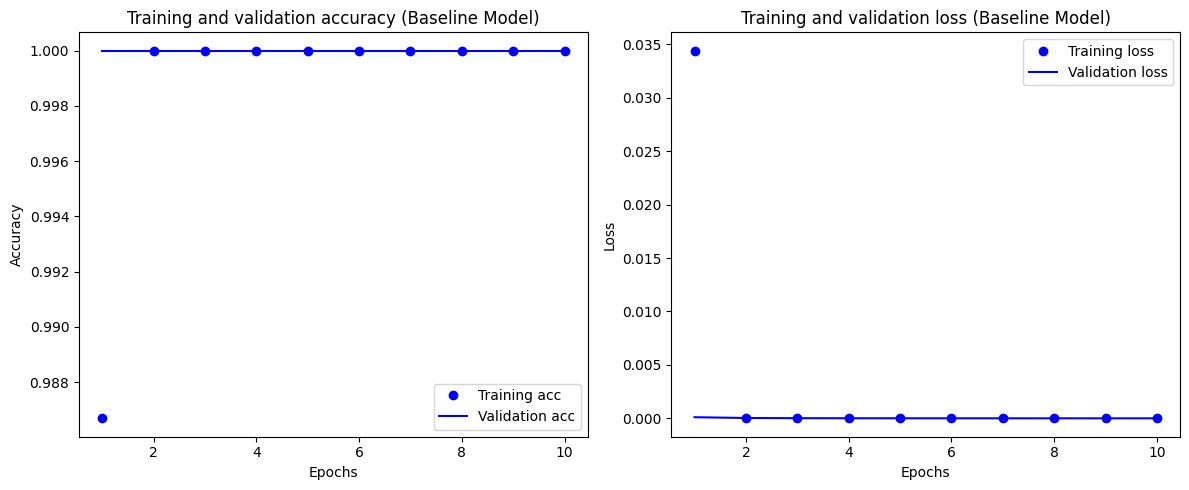

In [62]:
plot_history(baseline_history, title="(Baseline Model)")


# Model with Dropout

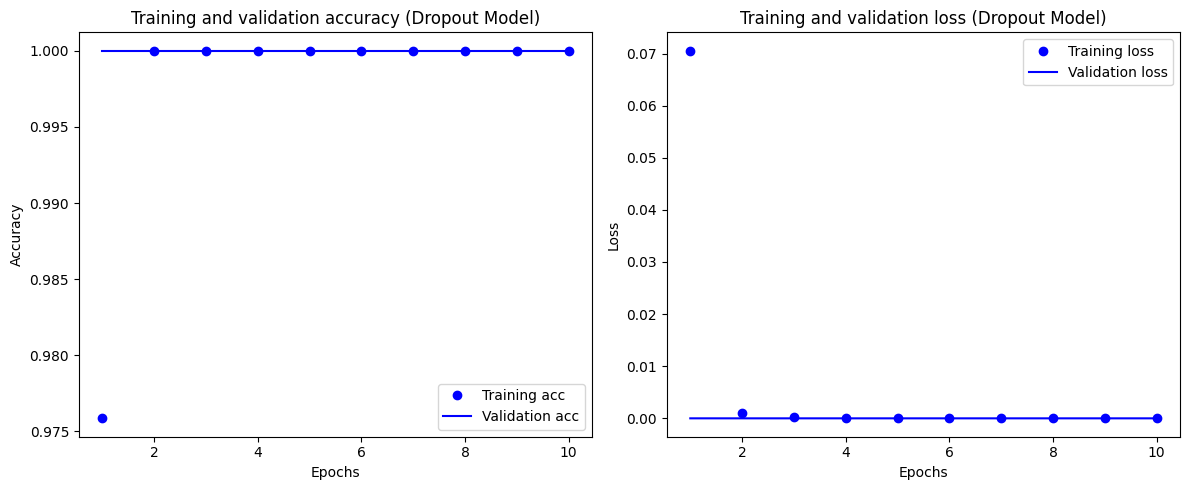

In [63]:
plot_history(dropout_history, title="(Dropout Model)")


# Model with Layer-wise Dropout

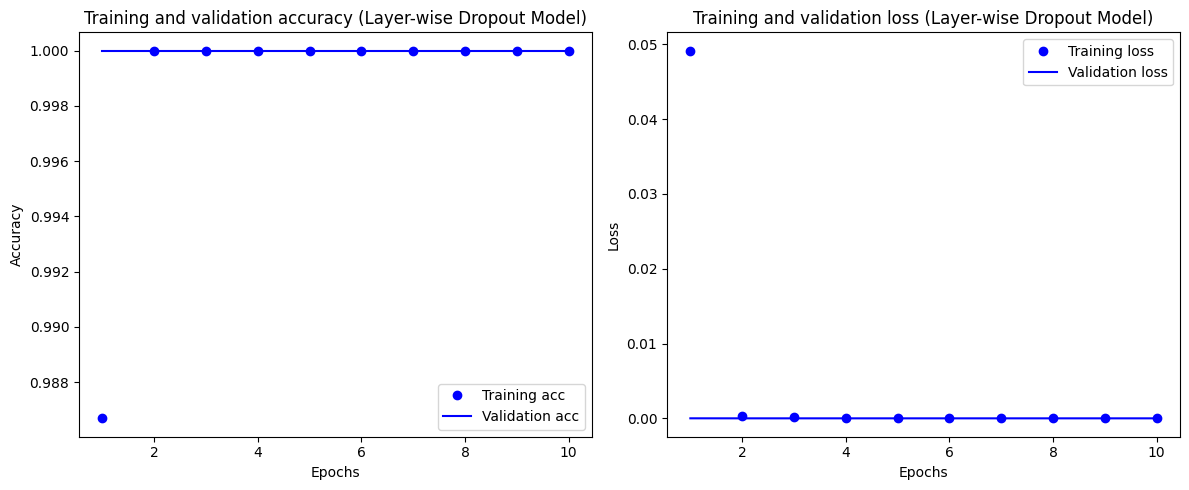

In [64]:
plot_history(layerwise_dropout_history, title="(Layer-wise Dropout Model)")
